# 1. Cleaning and preparing data:
   a. Clean the data of errors and inconsistencies.
   b. Deal with missing values and outliers.
   c. Transform the data into a format suitable for analysis and processing.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data = pd.read_csv("./dataset/train_data.csv")
test_data = pd.read_csv("./dataset/test_data.csv")
test_data_hidden = pd.read_csv("./dataset/test_data_hidden.csv")

print(train_data.head())
print(test_data.head())
print(test_data_hidden.head())

# filling missing values with a placeholder for all columns
train_data.fillna("Unknown", inplace=True)
test_data.fillna("Unknown", inplace=True)
test_data_hidden.fillna("Unknown", inplace=True)

# converting 'reviews.date' to datetime format
train_data['reviews.date'] = pd.to_datetime(train_data['reviews.date'], errors='coerce')
test_data['reviews.date'] = pd.to_datetime(test_data['reviews.date'], errors='coerce')
test_data_hidden['reviews.date'] = pd.to_datetime(test_data_hidden['reviews.date'], errors='coerce')

# checking for data type inconsistencies 
print(train_data.info())
print(test_data.info())
print(test_data_hidden.info())

# saving the cleaned data into new csv files
train_data.to_csv("./dataset/cleaned_train_data.csv", index=False)
test_data.to_csv("./dataset/cleaned_test_data.csv", index=False)
test_data_hidden.to_csv("./dataset/cleaned_test_data_hidden.csv", index=False)

                                                name   brand  \
0  All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi...  Amazon   
1        Amazon - Echo Plus w/ Built-In Hub - Silver  Amazon   
2  Amazon Echo Show Alexa-enabled Bluetooth Speak...  Amazon   
3  Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...  Amazon   
4  Brand New Amazon Kindle Fire 16gb 7" Ips Displ...  Amazon   

                                          categories  \
0  Electronics,iPad & Tablets,All Tablets,Fire Ta...   
1  Amazon Echo,Smart Home,Networking,Home & Tools...   
2  Amazon Echo,Virtual Assistant Speakers,Electro...   
3  eBook Readers,Fire Tablets,Electronics Feature...   
4  Computers/Tablets & Networking,Tablets & eBook...   

             primaryCategories              reviews.date  \
0                  Electronics  2016-12-26T00:00:00.000Z   
1         Electronics,Hardware  2018-01-17T00:00:00.000Z   
2         Electronics,Hardware  2017-12-20T00:00:00.000Z   
3  Office Supplies,Electronics  2017-0

# 2. Conducting exploratory data analysis (EDA)
   a. Explore the data to understand its distribution, the relationships between variables, and note any outliers.


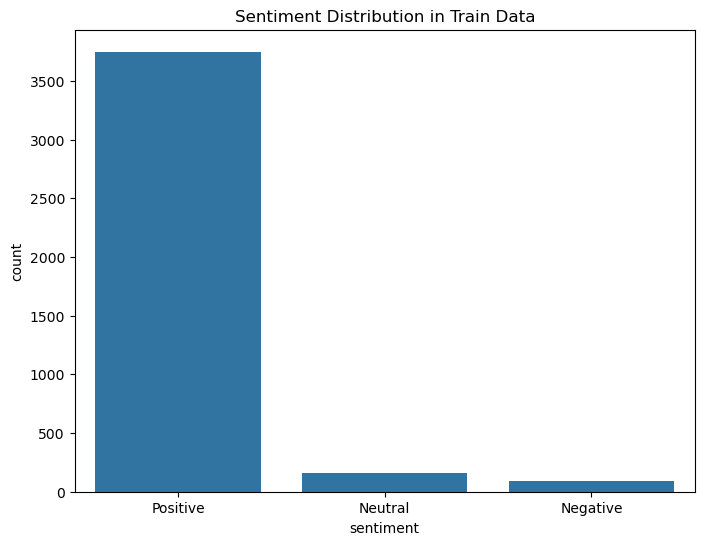

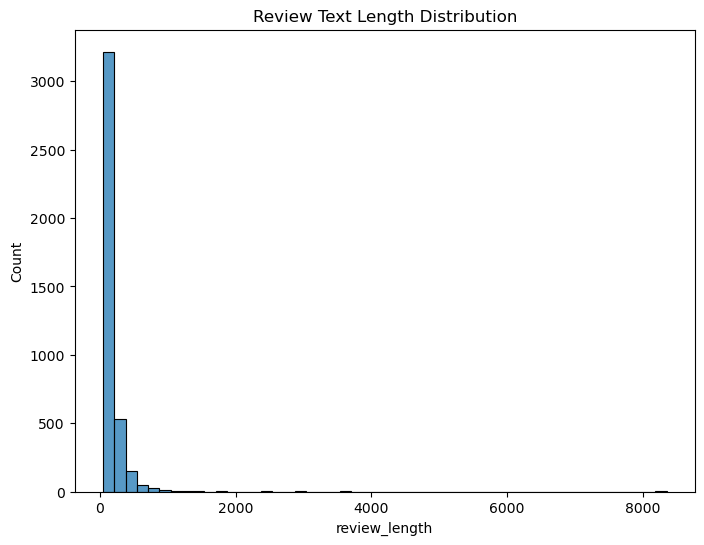

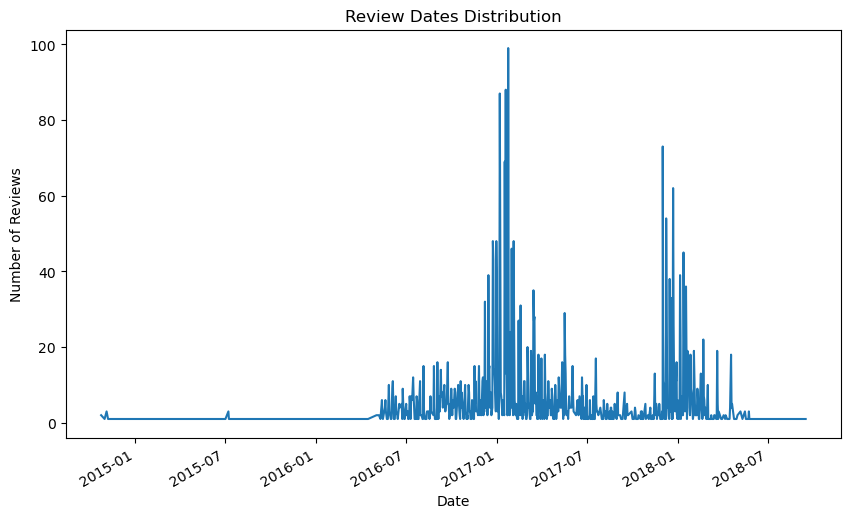

In [5]:
# Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='sentiment')
plt.title('Sentiment Distribution in Train Data')
plt.show()

# Reviews length analysis
train_data['review_length'] = train_data['reviews.text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(train_data['review_length'], bins=50)
plt.title('Review Text Length Distribution')
plt.show()

# Analyze the distribution of review dates
plt.figure(figsize=(10, 6))
train_data['reviews.date'].value_counts().sort_index().plot()
plt.title('Review Dates Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()